In [136]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

In [137]:
def wave1(x, t):
    return np.cos(t - x) + np.cos(1.2 * t - 1.2 * x)


def wave2(x, y, t):
    f1 = 20
    f2 = 50
    k1 = f1
    k2 = f2

    return (np.cos(2 * np.pi * f1 * t - np.sqrt((2 * np.pi * k1 * (x - 50)) ** 2 + (2 * np.pi * k1 * (y - 50)) ** 2))
            + np.cos(2 * np.pi * f2 * t - np.sqrt(
                (2 * np.pi * k2 * (x - 50)) ** 2 + (2 * np.pi * k2 * (y - 50)) ** 2))) / 2 * np.exp(-t)


def wave3(x, y, t):
    return np.sin(2 * np.pi * t - np.sqrt((2 * np.pi * (x - 50)) ** 2 + (2 * np.pi * (y - 50)) ** 2)) / np.exp(-t)


def pulse1(x, y, t):
    return 4 * np.sqrt((x - 50) ** 2 + (y - 50) ** 2) + 5 * t + 4


def pulse2(x, y, t):
    """
    y=exp(-(sqrt(x^2+y^2)-t)^2)*(sin(sqrt(x^2+y^2)-t)+cos(sqrt(x^2+y^2)-t))
    """
    center_x = 0
    center_y = 50
    omega_0 = 2 * np.pi * 10  # 2 * pi * f
    omega_1 = 2 * np.pi * 20  # 2 * pi * f
    omega_2 = 2 * np.pi * 30  # 2 * pi * f
    k_0 = 1
    k_1 = 2
    k_2 = 3

    return np.exp(
        -1 / 50 * (np.sqrt(k_0 * (x - center_x) ** 2 + k_0 * (y - center_y) ** 2) - omega_0 * t) ** 2) * 0.5 * (np.sin(
        np.sqrt(k_1 * (x - center_x) ** 2 + k_1 * (y - center_y) ** 2) - omega_1 / 2 * t) + np.cos(
        np.sqrt(k_2 * (x - center_x) ** 2 + k_2 * (y - center_y) ** 2) - omega_2 / 5 * t))

In [138]:
resolution_x = 100  # pixels
resolution_y = 100  # pixels
resolution_t = 100  # pixels

x_max = 100  # m
y_max = 100  # m
t_max = 2  # s

Fs = resolution_t / t_max  # sampling frequency, (Hz)
Kxs = resolution_x / x_max  # spatial sampling frequency along X in (1/m)
Kys = resolution_y / y_max  # spatial sampling frequency along Y in (1/m)
print('Fs', Fs)
print('Kxs', Kxs)
print('Kys', Kys)
X = np.arange(0, x_max, 1 / Kxs)
Y = np.arange(0, y_max, 1 / Kys)
T = np.arange(0, t_max, 1 / Fs)
x, y = np.meshgrid(X, Y)

z = np.zeros((len(X), len(Y), len(T)))
for i, t in enumerate(T):
    z[:, :, i] = pulse2(x, y, t)

print('z.shape', z.shape)

Fs 50.0
Kxs 1.0
Kys 1.0
z.shape (100, 100, 100)


In [139]:
fps = resolution_t / t_max
# fps = 10
print('fps', fps)

fps 50.0


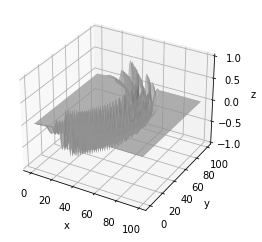

In [140]:
def change_plot(frame_number, z_array, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(x, y, z_array[:, :, frame_number], cmap="viridis")


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
surface = [ax.plot_surface(x, y, z[:, :, 50], color='0.75', rstride=1, cstride=1)]
ax.set_zlim(-1, 1)

plt.show()

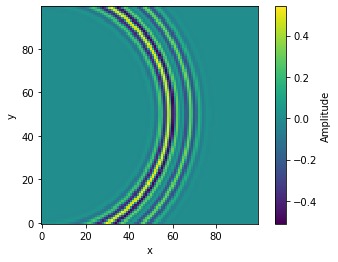

In [141]:
def change_plot_img(frame_number, z_array, plot):
    plot[0].remove()
    plot[0] = ax.pcolormesh(x, y, z_array[:, :, frame_number], cmap='viridis')


fig2 = plt.figure()
ax = fig2.add_subplot()
ax.set_xlabel('x')
ax.set_ylabel('y')
image = [ax.pcolormesh(x, y, z[:, :, 50], cmap='viridis')]
ax.set_aspect(x_max / y_max)
plt.colorbar(image[0], label='Amplitude')
plt.show()

In [142]:
KX = np.linspace(-Kxs / 4, Kxs / 4, resolution_x)
KY = np.linspace(-Kys / 4, Kys / 4, resolution_y)
FREQ = np.linspace(0, Fs / 2, resolution_t)

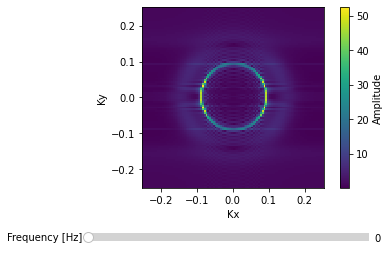

In [143]:
fft_wave2 = np.abs(np.fft.fftshift(np.fft.fftn(z), axes=(0, 1)))
fig3 = plt.figure()
ax = fig3.add_subplot()
ax.set_xlabel('Kx')
ax.set_ylabel('Ky')
Kx, Ky = np.meshgrid(KX, KY)
image_fft = ax.pcolormesh(Kx, Ky, fft_wave2[:, :, 0], cmap='viridis')
ax.set_aspect(Kxs / Kys)
plt.colorbar(image_fft, label='Amplitude')
plt.subplots_adjust(bottom=0.25)
ax_freq = plt.axes([0.20, 0.05, 0.65, 0.06])
freq_slider = Slider(
    ax=ax_freq,
    label='Frequency [Hz]',
    valmin=0,
    valmax=Fs / 2,
    valinit=0,
    valstep=Fs / 2 / 100,
)


def update(val):
    ax.pcolormesh(Kx, Ky, fft_wave2[:, :, int(val * resolution_t / (Fs / 2)) - 1], cmap='viridis')
    fig3.canvas.draw_idle()


freq_slider.on_changed(update)
plt.show()

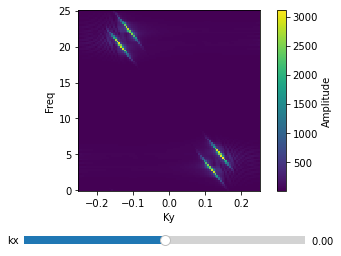

In [144]:
fft_wave2 = np.abs(np.fft.fftn(z))
fig4 = plt.figure()
ax = fig4.add_subplot()
ax.set_xlabel('Ky')
ax.set_ylabel('Freq')
Ky, Freq = np.meshgrid(KY, FREQ)
image_fft_kx = ax.pcolormesh(Ky, Freq, fft_wave2[0, :, :].T, cmap='viridis')
ax.set_aspect(Kys / Fs)
plt.colorbar(image_fft_kx, label='Amplitude')
plt.subplots_adjust(bottom=0.25)
ax_kx = plt.axes([0.20, 0.05, 0.65, 0.06])
kx_slider = Slider(
    ax=ax_kx,
    label='kx',
    valmin=-Kxs / 4,
    valmax=Kxs / 4,
    valinit=0,
    valstep=Kxs / 2 / 100,
)


def update_kx(val):
    ax.pcolormesh(Ky, Freq, fft_wave2[int(val * resolution_x / (Kxs / 2)) - 1, :, :].T, cmap='viridis')
    fig4.canvas.draw_idle()


kx_slider.on_changed(update_kx)
plt.show()

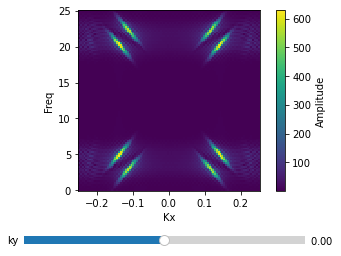

In [145]:
fig5 = plt.figure()
ax = fig5.add_subplot()
ax.set_xlabel('Kx')
ax.set_ylabel('Freq')
Kx, Freq = np.meshgrid(KX, FREQ)
image_fft_ky = ax.pcolormesh(Kx, Freq, fft_wave2[:, 0, :].T, cmap='viridis')
ax.set_aspect(Kxs / Fs)
plt.colorbar(image_fft_ky, label='Amplitude')
plt.subplots_adjust(bottom=0.25)
ax_ky = plt.axes([0.20, 0.05, 0.65, 0.06])
kx_slider = Slider(
    ax=ax_ky,
    label='ky',
    valmin=-Kys / 4,
    valmax=Kys / 4,
    valinit=0,
    valstep=Kys / 2 / 100,
)


def update_ky(val):
    ax.pcolormesh(Kx, Freq, fft_wave2[:, int(val * resolution_y / (Kys / 2)) - 1, :].T, cmap='viridis')
    fig5.canvas.draw_idle()


kx_slider.on_changed(update_ky)
plt.show()